In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
import os
import sys
from pathlib import Path
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

from scipy.stats import boxcox

HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))

ERA_DATA_PATH = str(HOME / 'system_tests/data/ERA5')

from dsrnngan.data import  get_ifs_filepath, all_ifs_fields

## Compare monthly averages

In [3]:
import pickle
import xarray as xr
year = 2018

monthly_ifs_mean = []
monthly_imerg_mean = []
for month in range(1, 13):
    with open(f'/user/home/uz22147/repos/downscaling-cgan/ifs_rainfall_data/monthly_rainfall_ifs_{year}_{month}.pkl', 'rb') as ifh:
        ifs_data = pickle.load(ifh)
        monthly_rainfall = ifs_data['monthly_rainfall']

    imerg_ds = xr.open_dataset(f'/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/monthly/{year}{month:02d}_total.nc')
    monthly_ifs_mean.append(1000*monthly_rainfall.values.mean())
    monthly_imerg_mean.append(imerg_ds['precipitationCal'].values.mean())


In [4]:
np.sum(monthly_ifs_mean)

927.9605897111051

In [5]:
np.sum(monthly_imerg_mean)

1956.5869

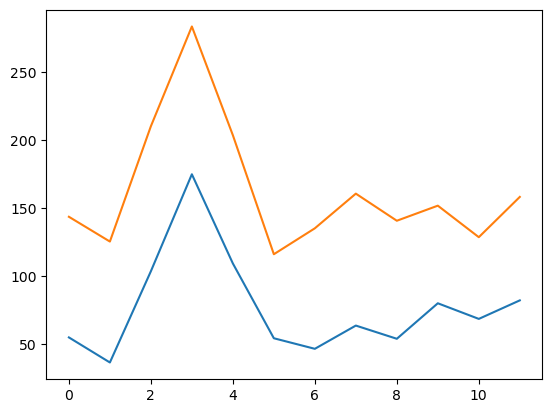

In [6]:
import matplotlib.pyplot as plt

plt.plot(monthly_ifs_mean)
plt.plot(monthly_imerg_mean)

In [48]:
# Verify that IFs data is loading correctly
from calendar import monthrange
from datetime import datetime
from dsrnngan.data import get_ifs_filepath, get_ifs_forecast_time, load_ifs, load_imerg
latitude_vals = np.arange(-11.95, 15.95, 0.1)
longitude_vals = np.arange(25.05, 49.05, 0.1)

month = 3
ifs_monthly_tot = 0
imerg_monthly_tot = 0
for day in range(1, monthrange(year, month)[1] +1):
    
    ifs_daily_tot = 0
    imerg_daily_tot = 0
    
    for hour in range(24):
        
        # try:
        ds_ifs = load_ifs('tp', datetime(year, month, day), hour, log_precip=False, norm=False, latitude_vals=latitude_vals, longitude_vals=longitude_vals)
        ifs_daily_tot += ds_ifs
        # except:
        #     print(f'No ifs data for {year} {month} {day} {hour}')

        ds_imerg = load_imerg(datetime(year, month, day), hour=hour,
                            data_dir='/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final/',
                        latitude_vals=latitude_vals, longitude_vals=longitude_vals)
        imerg_daily_tot += ds_imerg
        
    
    ifs_monthly_tot += ifs_daily_tot
    imerg_monthly_tot += imerg_daily_tot
        

In [50]:
ifs_monthly_tot.mean()

84.73873720185836

In [51]:
imerg_monthly_tot.mean()

99.334045

## Notes

Cumulative fields: tp
tisr
cp

Fields to use conservative interpolation: tp, tclw, cape, tisr, tcwv, cp


In [21]:
from datetime import datetime, timedelta
from dsrnngan.data import load_ifs, load_ifs_raw, load_imerg, get_ifs_forecast_time
latitude_vals = np.arange(-11.95, 15.95, 0.1)
longitude_vals = np.arange(25.05, 49.05, 0.1)

IFS_DATA_DIR = '/bp1/geog-tropical/users/uz22147/east_africa_data/IFS/'
# Check data loading correctly
year = 2019
month=2
day=19
hour = 20

loaddate, loadtime = get_ifs_forecast_time(year, month, day, hour)
fp = get_ifs_filepath(field='tp', 
                          fcst_dir='/bp1/geog-tropical/users/uz22147/east_africa_data/IFS/',
                          loaddate=loaddate, loadtime=loadtime)
ds = xr.open_dataset(fp)

ds2 = load_ifs('tp', datetime(year, month, day), hour, log_precip=False, norm=False, latitude_vals=latitude_vals, longitude_vals=longitude_vals)

ds_imerg = load_imerg(datetime(year, month, day), hour=hour, data_dir='/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final/')

In [109]:
ds.groupby("time").mean(...)['tp']

<xarray.DataArray 'tp' (time: 73)>
array([0.0000000e+00, 8.2105864e-05, 1.5089268e-04, 2.0090304e-04,
       2.3122256e-04, 2.5225064e-04, 2.7202361e-04, 2.9203304e-04,
       3.1335256e-04, 3.3689293e-04, 3.6249682e-04, 3.9159658e-04,
       4.2434916e-04, 4.5709722e-04, 4.8988214e-04, 5.2531832e-04,
       5.6330976e-04, 6.0456572e-04, 6.4858515e-04, 6.9708022e-04,
       7.5979379e-04, 8.3648541e-04, 9.3118899e-04, 1.0480972e-03,
       1.1734159e-03, 1.2760601e-03, 1.3486815e-03, 1.3996146e-03,
       1.4333980e-03, 1.4645245e-03, 1.4985029e-03, 1.5340796e-03,
       1.5720056e-03, 1.6183957e-03, 1.6733506e-03, 1.7394945e-03,
       1.8108214e-03, 1.8861083e-03, 1.9641228e-03, 2.0429760e-03,
       2.1200923e-03, 2.1945501e-03, 2.2643111e-03, 2.3355319e-03,
       2.4097397e-03, 2.4889356e-03, 2.5806541e-03, 2.6905390e-03,
       2.8130617e-03, 2.9299429e-03, 3.0256310e-03, 3.0941574e-03,
       3.1403091e-03, 3.1865074e-03, 3.2331159e-03, 3.2825088e-03,
       3.3381712e-03, 3.4048727e-03, 3.4863639e-03, 3.5856436e-03,
       3.6980787e-03, 3.8278417e-03, 3.9613927e-03, 4.1058883e-03,
       4.2788470e-03, 4.4694575e-03, 4.6563931e-03, 4.8489007e-03,
       5.0634821e-03, 5.3112563e-03, 5.5850497e-03, 5.8673555e-03,
       6.1416561e-03], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-02-19T12:00:00 ... 2019-02-22T12:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [132]:
hour = 20

time = datetime(year=year, month=month, day=day, hour=hour)

time_plus_one = datetime(year=year, month=month, day=day, hour=hour) + timedelta(hours=1)
time_minus_one = datetime(year=year, month=month, day=day, hour=hour) - timedelta(hours=1)

ds2 = ds['tp'].sel(time=time_plus_one) - ds['tp'].sel(time=time)
ds3 = ds['tp'].sel(time=time) - ds['tp'].sel(time=time_minus_one)

In [44]:
ds3 = load_ifs('tp', datetime(year, month, day), hour, log_precip=False, norm=False)
dsraw = load_ifs_raw('tp', year, month, day, hour)

In [135]:
from dsrnngan.data import get_ifs_forecast_time

time = datetime(year=year, month=month, day=day, hour=hour)
time_plus_one = datetime(year=year, month=month, day=day, hour=hour) + timedelta(hours=1)
time_minus_one = datetime(year=year, month=month, day=day, hour=hour) - timedelta(hours=1)

# Get the nearest forecast starttime
loaddate, loadtime = get_ifs_forecast_time(year, month, day, hour)

fp = get_ifs_filepath(field='tp',
                        loaddate=loaddate,
                        loadtime=loadtime,
                        fcst_dir=IFS_DATA_DIR
                        )

ds = xr.open_dataset(fp)
var_names = list(ds.data_vars)

assert len(var_names) == 1, ValueError('More than one variable found; cannot automatically infer variable name')
var_name = list(ds.data_vars)[0]

# Multiplication with float32 leads to some discrepancies
ds[var_name] = ds[var_name].astype(np.float64)
    
# Account for cumulative fields
ds_t = ds.sel(time=time)
ds_tm1 = ds.sel(time=time_minus_one)
ds.sel(time=time_plus_one)
ds =  0.5* ((ds.sel(time=time) - ds.sel(time=time_minus_one)) + (ds.sel(time=time_plus_one) - ds.sel(time=time)))


In [141]:
# check daily
from dsrnngan.data import DEFAULT_LATITUDE_RANGE, DEFAULT_LONGITUDE_RANGE
imerg_daily = xr.load_dataset('/bp1/geog-tropical/data/Obs/IMERG/Final/3B-DAY.MS.MRG.3IMERG.20190219-S000000-E235959.V06.nc4')
imerg_daily = imerg_daily.sel(lon=DEFAULT_LONGITUDE_RANGE + 1e-6, method='nearest')
imerg_daily = imerg_daily.sel(lat=DEFAULT_LATITUDE_RANGE + 1e-6, method='nearest')

In [124]:
from dsrnngan.data import load_imerg

year = 2019
month=2
day=19
means = []
for hour in range(0,24):
    ds_imerg = load_imerg(datetime(year, month, day), hour=hour, data_dir='/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final/')
    means.append((hour, ds_imerg.mean()))

In [139]:
from glob import glob

year = 2019
month=2
day=19
hour = 20
suffix = f'-S{hour:02d}*'
imerg_fps = glob(f'/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final/3B-HHR.MS.MRG.3IMERG.{year}{month:02d}{day:02d}{suffix}')


In [68]:
imerg_ds = xr.load_dataset(imerg_fps[0])

In [69]:
imerg_ds['precipitationCal'].values.mean()

0.06869906

['2t', 'cape', 'cin', 'cp', 'r200', 'r700', 'r950', 'sp', 't200', 't700', 'tclw', 'tcwv', 'tisr', 'tp', 'u200', 'u700', 'v200', 'v700', 'w200', 'w500', 'w700']
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
2t, t2m: 2 metre temperature
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
cape, cape: Convective available potential energy
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
cin, cin: Convective inhibition
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
cp, cp: Convective precipitation
     cp  appears to be a cumulative field
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
r200, r: Relative humidity
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
r700, r: Relative humidity
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
r950, r: Relative humidity
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
sp, sp: Surface pressure
********
Frozen({'longitude'

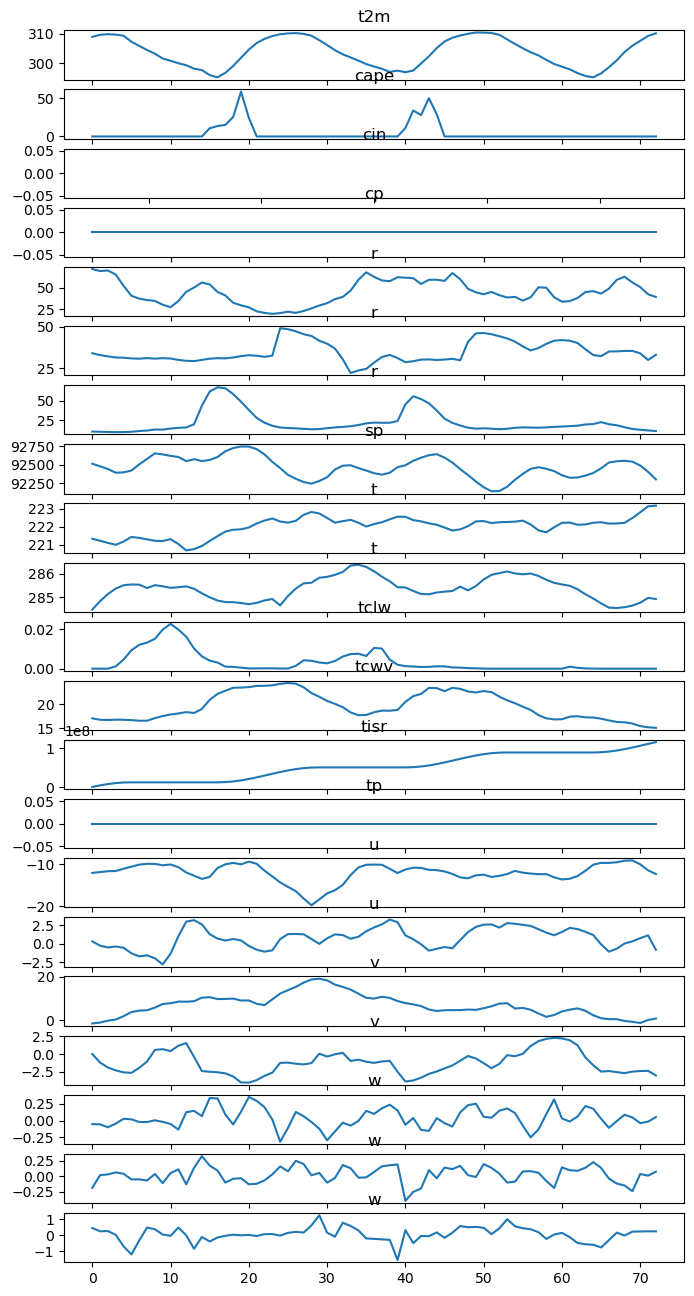

In [9]:
import re
from datetime import datetime

vars = all_ifs_fields
print(vars)

fig, ax = plt.subplots(len(vars), 1, figsize = (8, 16))
neg_fraction_dict = {}
nan_fraction_dict = {}
for n, var in enumerate(vars):

    print('*'*8)
    fp = get_ifs_filepath(field=var, 
                          fcst_dir='/bp1/geog-tropical/users/uz22147/IFS_east_africa',
                          loaddate=datetime(2016, 7, 2), loadtime='12')
    ds = xr.open_dataset(fp)
    var_name = list(ds.data_vars)[0]
    
    print(ds.dims)
    print(f"{var}, {var_name}: {ds[var_name].attrs['long_name']}")
    
    nan_fraction = np.isnan(ds[var_name].values).sum() /  len( ds[var_name].values.flatten())
    nan_fraction_dict[var] = nan_fraction
    
    negative_fraction = len([item for item in ds[var_name].values.flatten() if item < 0]) / len( ds[var_name].values.flatten())
    neg_fraction_dict[var] = negative_fraction
    
    sample = ds.isel(latitude=0).isel(longitude=0)

    ax[n].plot(sample[var_name].values)
    ax[n].set_title(var_name)
    
    if list(sample[var_name].values) == sorted(sample[var_name].values):
        print('    ',var, ' appears to be a cumulative field')


In [12]:
# load cin
fp = os.path.join('/user/work/uz22147', 'cin_HRES_1h_EAfrica_2016-07-02_12h.nc')

ds = xr.load_dataset(fp)

In [8]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 265, latitude: 280, time: 73)
Coordinates:
  * longitude  (longitude) float32 25.05 25.15 25.25 25.35 ... 51.25 51.35 51.45
  * latitude   (latitude) float32 15.95 15.85 15.75 ... -11.75 -11.85 -11.95
  * time       (time) datetime64[ns] 2018-07-29T12:00:00 ... 2018-08-01T12:00:00
Data variables:
    v          (time, latitude, longitude) float32 -5.301 -5.334 ... -14.32
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-15 08:24:28 GMT by grib_to_netcdf-2.23.0: grib_to_n...

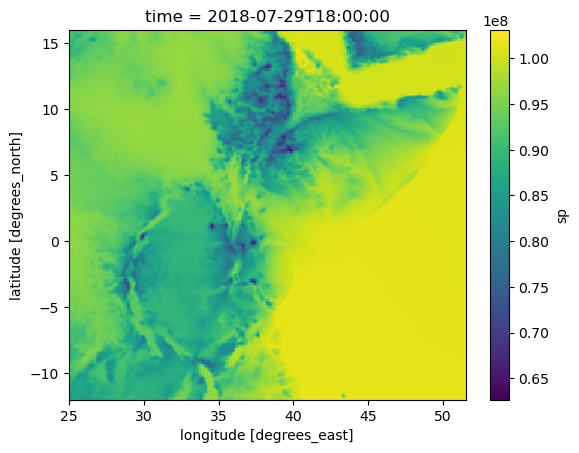

In [10]:
# Load and plot IFs data
from datetime import datetime
year = 2018
month = 7
day = 29
var = 'sp'
fp = get_ifs_filepath(var, loaddate=datetime(year, month, day), loadtime=12)
ds = xr.load_dataset(fp)
ds['sp'] = ds['sp'] * 1000
ds['sp'].isel(time=6).plot()

In [2]:
print("N CRPS CRPS_max_4 CRPS_max_16 CRPS_avg_4 CRPS_avg_16 RMSE EMRMSE EMRMSE_FCST RALSD MAE OP CORR CORR_ENS CORR_FCST".split(' '))

['N', 'CRPS', 'CRPS_max_4', 'CRPS_max_16', 'CRPS_avg_4', 'CRPS_avg_16', 'RMSE', 'EMRMSE', 'EMRMSE_FCST', 'RALSD', 'MAE', 'OP', 'CORR', 'CORR_ENS', 'CORR_FCST']


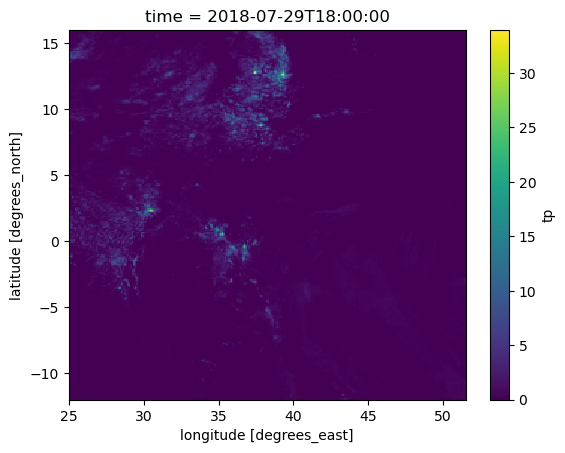

In [48]:
fp = get_ifs_filepath('tp', loaddate=datetime(year, month, day), loadtime=12)
ds = xr.load_dataset(fp)
ds['tp'] = ds['tp'] * 1000
ds['tp'].isel(time=6).plot()

2018-07-29 19:00:00
2018-07-29 18:00:00
12
12.25193403661251
2018-07-29 19:00:00
2018-07-29 18:00:00
12
1.1222792654527165


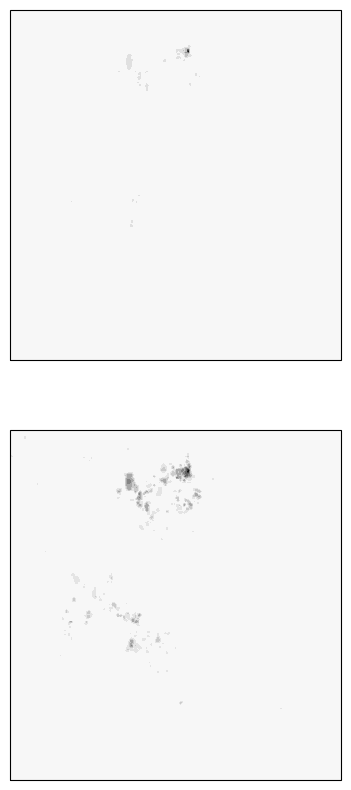

In [50]:
from dsrnngan.data import load_ifs_raw, load_ifs
import cartopy.crs as ccrs
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10), 
                        subplot_kw={'projection': ccrs.PlateCarree()})

ds = load_ifs_raw('tp', year, month, day, 18)
ds['tp'] = ds['tp']*1000
print(ds['tp'].values.max())
im = axs[0].contourf(ds.longitude.values, ds.latitude.values , ds['tp'].values, transform=ccrs.PlateCarree(),
                        cmap='Greys')

data = load_ifs('tp', datetime(year, month, day), 18, log_precip=True)
print(data.max())
im = axs[1].contourf(ds.longitude.values, ds.latitude.values , data, transform=ccrs.PlateCarree(),
                        cmap='Greys')

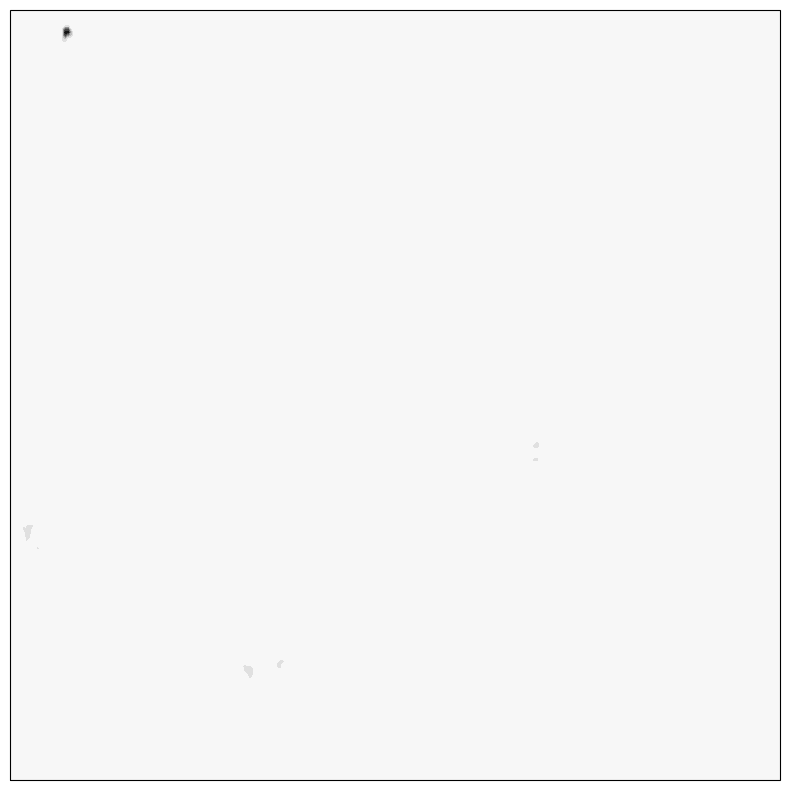

In [41]:
# imerg on the same day
from dsrnngan.data import load_imerg_raw
ds_hr = load_imerg_raw(year, month, day, 18, 
                                       imerg_data_dir='/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10), 
                        subplot_kw={'projection': ccrs.PlateCarree()})

im = axs.contourf(ds_hr.lon.values, ds_hr.lat.values , ds_hr['precipitationCal'].values, transform=ccrs.PlateCarree(),
                        cmap='Greys')

In [15]:
ds['tp'].isel(time=0).values.shape

(280, 265)